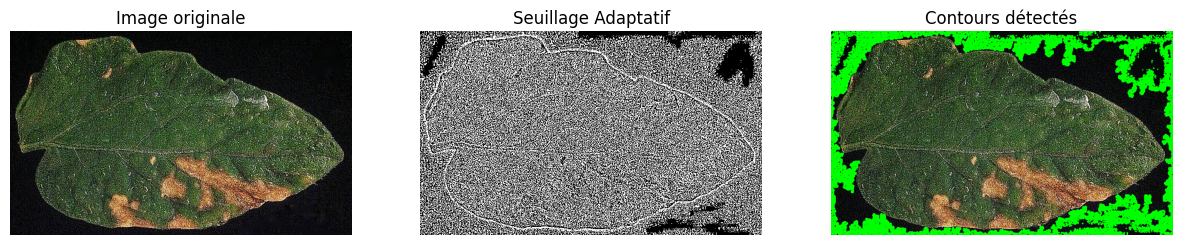

In [19]:
# ðŸ“Œ Importer les bibliothÃ¨ques
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ðŸ“Œ Charger l'image
image_path = "tomato_sample.jpg"  # Remplace par le chemin de ton image
image = cv2.imread(image_path)

if image is None:
    print("Erreur : Image non trouvÃ©e. VÃ©rifie le chemin du fichier.")
else:
    # ðŸ“Œ Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # ðŸ“Œ Appliquer un seuillage adaptatif
    adaptive_thresh = cv2.adaptiveThreshold(
        gray, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # ou cv2.ADAPTIVE_THRESH_MEAN_C
        cv2.THRESH_BINARY_INV, 
        11,  # Taille du bloc (doit Ãªtre impair)
        2    # Valeur constante soustraite
    )

    # ðŸ“Œ DÃ©tection des contours
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # ðŸ“Œ Dessiner les contours sur l'image originale
    image_contours = image.copy()
    cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)  # Vert

    # ðŸ“Œ Affichage des rÃ©sultats avec Matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Image originale")
    axs[0].axis("off")

    axs[1].imshow(adaptive_thresh, cmap="gray")
    axs[1].set_title("Seuillage Adaptatif")
    axs[1].axis("off")

    axs[2].imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Contours dÃ©tectÃ©s")
    axs[2].axis("off")

    plt.show()


In [1]:
!python --version

Python 3.10.0rc2
